## Step 1: Reading and Understanding the Data

In [86]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [81]:
## import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
## load the dataset
boomData = pd.read_csv("day.csv")
boomData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
## lets check the shape of the dataset
boomData.shape

(730, 16)

In [6]:
##lets check how many missing values are there
boomData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [10]:
## other way to confirm that there are no missinf data
print(100 * boomData.isnull().sum()/boomData.shape[0])
print("-----------------------------------------------------------------------------------------")

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64
-----------------------------------------------------------------------------------------



### Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [13]:
##lets look at the data again
boomData.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


If we look at the description of the ```season``` and ```weathersit```, though they are numbers, they are actually categorical in nature. So, lets convert them to strings in order to get more sense to data

In [14]:
## value counts of season
boomData.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

lets write a function to convert these to their respective meanings, based on the data dictionary 
- 1:spring
- 2:summer
- 3:fall
- 4:winter


In [17]:
## lets remap the season values
boomData.season = boomData.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
boomData.season.head()

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object

In [18]:
## value counts of weathersit
boomData.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

lets write a function to convert these to their respective meanings, based on the data dictionary 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

And in the value counts we can see that there are only three values and not four, lets make them to Clear,Mist,Rainy

In [19]:
## lets remap the weathersit values
boomData.weathersit = boomData.weathersit.map({1:"Clear", 2:"Mist", 3:"Rainy"})
boomData.weathersit.head()

0     Mist
1     Mist
2    Clear
3    Clear
4    Clear
Name: weathersit, dtype: object

In [20]:
## printing the dataframe againa
boomData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [21]:
## Lets look at the value_counts of year
boomData.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

So, we have exactly two years data which are 365 days each. Lets not drop this column as it makes sense to see the trend across two years

In [24]:
## Since the dataset has captured the year, month , weekday and weekend. 'dteday' field is not required, lets drop it
## we can wven drop the 'instant' column as its just an index and doesnt add any insight numerically
boomData.drop(columns = ['dteday','instant'] , inplace=True)
boomData.shape

(730, 14)

In [26]:
## lets look at the weekday values
boomData.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

##### Weekday
- We are not dropping ```weekday``` keeping in mind that monday to sunday has an increasing trend. Its better being numerical!
- We also see that this column can be rearranged to make more sense. 
- 01-01-2018 was a Monday but the weekday is marked as 6 instead of 2 as its the second day of the week.
- Instead we can go srom ```Sunday``` to ```Saturday``` with numbers ranging from ```1``` to ```7```

In [30]:
## lets remap values in this particular column
boomData.weekday = boomData.weekday.map({0:3,1:4,2:5,3:6,4:7,5:1,6:2})
boomData.weekday.head()

### After cleaning the data, we are left with 730 rows and 14 columns

# 2) Visualising Data

In [32]:
##lets print the dataframe again
boomData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,2,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,3,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,4,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,5,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,6,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [33]:
## lets print the statistics of all the numerical columns now

boomData.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,3.993151,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.500343,3.450215,0.167266,1.998959,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,0.000000,1.000000,0.000000,1.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,0.000000,4.000000,0.000000,2.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,0.500000,7.000000,0.000000,4.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,1.000000,10.000000,0.000000,6.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,1.000000,12.000000,1.000000,7.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [40]:
## lets get the list of independent and dependent variables
independent_variables = list(set(list(boomData.columns)) - set(['cnt']))
dependent_variables = ["cnt"]

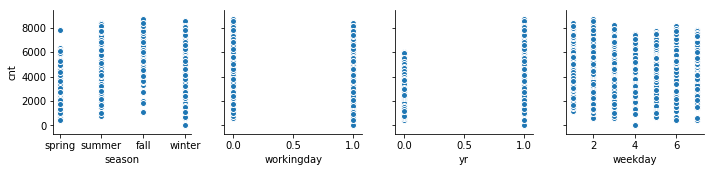

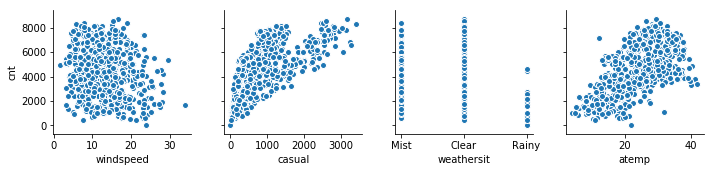

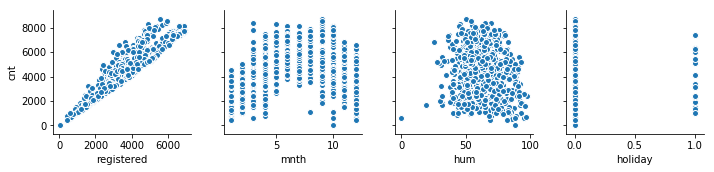

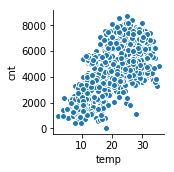

In [45]:
### Lets plot a pair plot of cnt with all the other variables
sns.pairplot(data = boomData,x_vars=independent_variables[0:4],y_vars=dependent_variables)

sns.pairplot(data = boomData,x_vars=independent_variables[4:8],y_vars=dependent_variables)

sns.pairplot(data = boomData,x_vars=independent_variables[8:12],y_vars=dependent_variables)

sns.pairplot(data = boomData,x_vars=independent_variables[12:],y_vars=dependent_variables)

#### Based on the above pair plots
- we can say that we can expect a linear realtion of ```cnt``` with ```atemp```,  ```temp``` ,```registered```, ```casual```
- we can see that ```windspeed```,```hum``` have kind of more diversely scattered plot with ```cnt```
- all the other variables are more categorical in nature


#### Visualising Categorical Variables

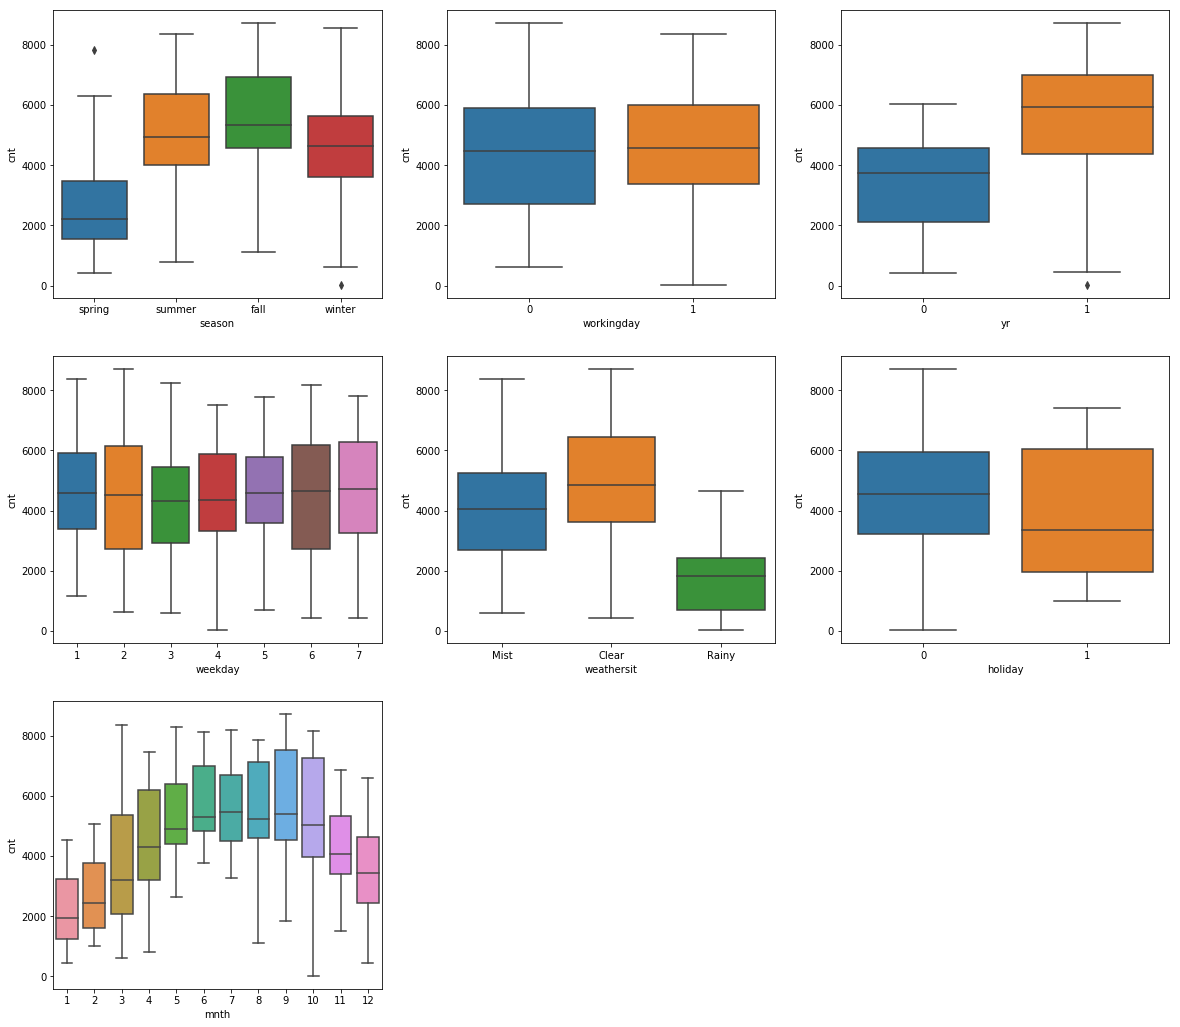

In [48]:
plt.figure(figsize=(20, 18))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = boomData)
plt.subplot(3,3,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = boomData)
plt.subplot(3,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = boomData)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = boomData)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boomData)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = boomData)
plt.subplot(3,3,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = boomData)
plt.show()

### High Level relations:
- We can see that during spring there are very less number of riders and more during summer and fall
- We see there are a lot of riders during 2019 compared to 2018
- If the weather situation is rainy we see a lot of less usage of the bikes.
- we see High usage on a non-holiday than a holiday
- When looked month wise we see a kind of increasing trend till July and then decreases towards the year end. this might be due to high work season in the mid of the year.
- All the above interpretations are using median data and we will have a clear picture once we look into the actual model.

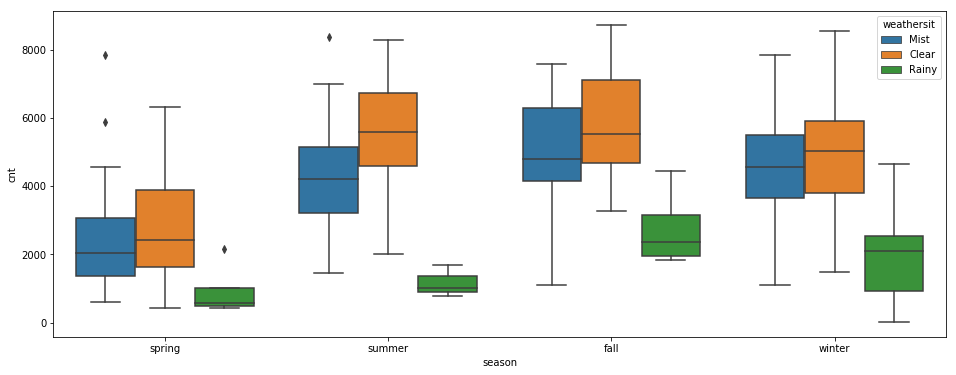

In [55]:
## Lets see cnt in each weather situation in each season
plt.figure(figsize = (16, 6))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = boomData)

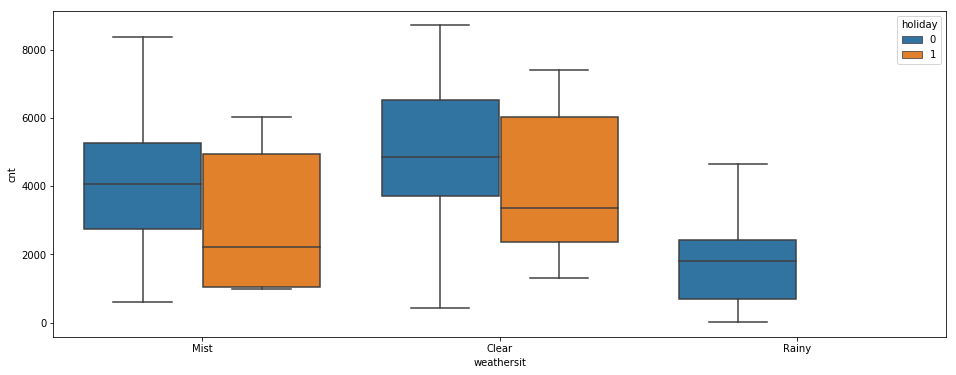

In [59]:
## Lets see affect of holiday in based on weather condition towards rider count
plt.figure(figsize = (16, 6))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'holiday', data = boomData)


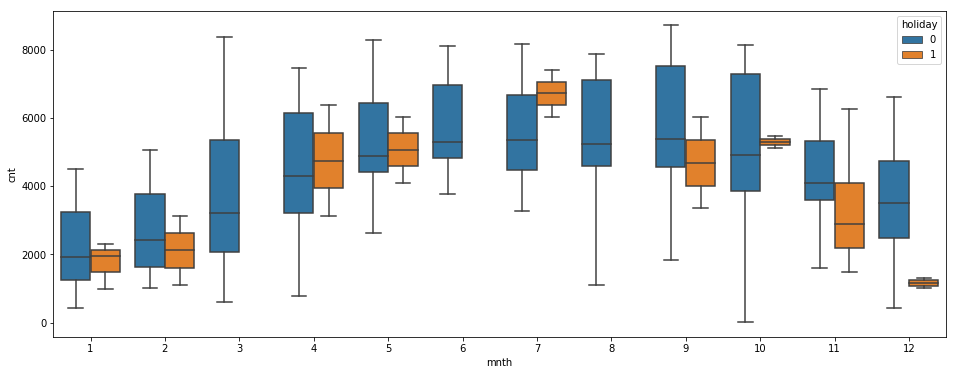

In [60]:
## Lets see affect of holiday in each month towards rider count
plt.figure(figsize = (16, 6))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'holiday', data = boomData)

## Bivariate analysis based on above plots:
   - We see that across all the seasons, if we observe a rainy weather situation, then riders are less
   - We donot see any data for people riding on a rainy day being a holiday. Other weather situations they do
   - Usually across most of the moths the median number of riders are around the same irrespective of holiday or not. But in the month of JULY people tend to drive more on holidays.
   - In the month of December we observe very less riders if there are holidays.

# 3) Data Preparation

- We see that most of the dual-cateogry variables are already available in 0's and 1's



### Dummy Varibales

##### Lets start with weathersit

In [61]:
## checking weathersit value_counts
boomData.weathersit.value_counts()

Clear    463
Mist     246
Rainy     21
Name: weathersit, dtype: int64

In [62]:
## lets create dummy variables for weather sit and store it in weather_dummies
weather_dummies = pd.get_dummies(boomData.weathersit)

In [63]:
## lets check what weather_dummies looks like
weather_dummies.head()

,Clear,Mist,Rainy
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


We can drop the first column ```Clear```, as we can interpret using mist and rainy. If both mist and rainy are 0 0 then its ```Clear```

In [66]:
#drop the first column
weather_dummies = pd.get_dummies(boomData.weathersit,drop_first=True)
weather_dummies.head()

,Mist,Rainy
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [70]:
## Lets drop weathersit, as we donot need it 
boomData = boomData.drop(columns=['weathersit'])

##### Lets now look at season

In [67]:
## checking season value_counts
boomData.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [68]:
## lets create dummy variables for season and store it in season_dummies and drop the first column to maintain n-1 dummies
season_dummies = pd.get_dummies(boomData.season,drop_first=True)

In [69]:
##lets see what it looks like
season_dummies.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [71]:
## Lets drop season, as we donot need it 
boomData = boomData.drop(columns=['season'])

### Now lets join these new columns with the main dataframe

In [73]:
boomData = pd.concat([boomData,weather_dummies,season_dummies],axis=1)
boomData.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Mist,Rainy,spring,summer,winter
0,0,1,0,2,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,1,0,0
1,0,1,0,3,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,1,0,0
2,0,1,0,4,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,0,1,0,5,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,0,1,0,6,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0


In [74]:
##lets relook at the shape
boomData.shape

(730, 17)

- We now increased the numer of columns to 17 from 14
- ```mnth``` and ```weekday``` are increasing categoric variable for us in terms of timeline. So we are keeping them as normal integers itself

## 4) Train-Test Split and Rescaling

In [88]:
# setting the seed so that train and test data set always have the same rows, respectively
np.random.seed(0)

# lets split train:test as 70% to 30%
boomData_train, boomData_test = train_test_split(boomData, train_size = 0.7, test_size = 0.3, random_state = 100)

In [89]:
print("train data shape is: ",boomData_train.shape)
print("test data shape is: ",boomData_test.shape)

train data shape is:  (510, 17)
test data shape is:  (219, 17)


## 5) Rescaling

Lets use the minmaxscaler of sklearn

In [90]:
## initialise the scaler
scaler = MinMaxScaler()

Lets scale all the variables apart from the variables which have only 0's and 1's

In [91]:
## lets look at the dataset again
boomData.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Mist,Rainy,spring,summer,winter
0,0,1,0,2,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,1,0,0
1,0,1,0,3,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,1,0,0
2,0,1,0,4,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,0,1,0,5,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,0,1,0,6,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0


In [92]:
## the below are list of variables which we want to scale
features_to_scale = ["mnth","weekday","temp","atemp","hum","windspeed","casual","registered","cnt"]

## fit_transform: learn the min max values and apply on these columns
boomData_train[features_to_scale] = scaler.fit_transform(boomData_train[features_to_scale])

In [93]:
## lets print the first few rows of train set again
boomData_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Mist,Rainy,spring,summer,winter
653,1,0.818182,0,0.666667,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243,0,0,0,0,1
576,1,0.545455,0,0.666667,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,0,0,0,0,0
426,1,0.181818,0,0.166667,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,1,0,1,0,0
728,1,1.000000,0,0.333333,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,0,0,1,0,0
482,1,0.272727,0,0.166667,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,1,0,0,1,0


In [94]:
## lets print the first few rows of train set again
boomData_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Mist,Rainy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.504456,0.025490,0.502288,0.676471,0.537262,0.512989,0.650369,0.320768,0.254661,0.523944,0.513620,0.343137,0.029412,0.243137,0.245098,0.24902
std,0.500429,0.315338,0.157763,0.328460,0.468282,0.225844,0.212385,0.145882,0.169797,0.206011,0.228175,0.224593,0.475223,0.169124,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.526811,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,1.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


We can see that all are rescaled to values between 0 and 1

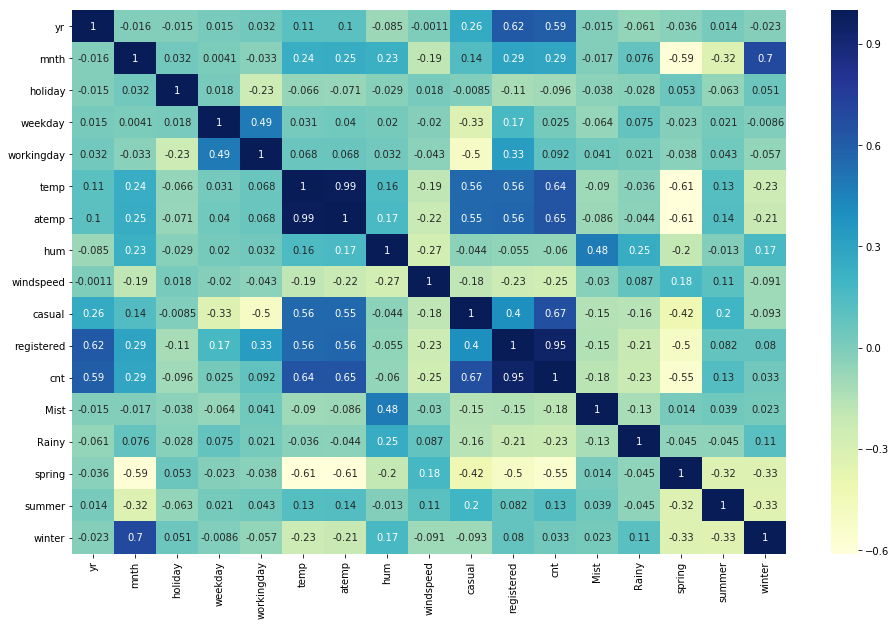

In [95]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(boomData_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### After rescaling, we observe that:

- ```registered``` is highly correlated with ```cnt``` .
- ```yr``` ,  ```temp```,  ```atemp```,  ```casual``` are having approximately around 0.6
- ```temp```  and  ```atemp``` are 99% correlated, not dropping one of them now, as VIF will eliminate it if necessary.